<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/215_rng.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(appendix-rng)=
# Generazione di numeri casuali

In questo insegnamento vengono introdotti molti concetti tramite la simulazione. Pertanto deve essere ben chiaro come sia possibile generare numeri casuali da varie distribuzioni di probabilità. In questo capitolo esamineremo [NumPy](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng) dato che questo modulo offre generatori di numeri casuali per tutte le principali distribuzioni di probabilità. 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az
from scipy.constants import golden
import scipy.stats as stats

In [3]:
%config InlineBackend.figure_format = 'retina'

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

La generazione di numeri casuali (RNG) è il processo mediante il quale si estrae una sequenza di numeri che, in realtà, non sono completamente casuali per varie ragioni.

Essi vengono estratti da una distribuzione di probabilità, con la più comune che è la distribuzione uniforme nel dominio 0≤𝑥<1, ovvero numeri casuali compresi tra zero e uno.

Nella maggior parte delle applicazioni informatiche, comprese quelle utilizzate in questo insegnamento, i numeri casuali sono in realtà pseudocasuali. Questo significa che dipendono completamente da un valore iniziale chiamato "seed" e vengono generati da un algoritmo deterministico basato su quel seed. Questo diventa evidente quando notiamo che otteniamo sempre la stessa sequenza di numeri casuali quando utilizziamo lo stesso seme, sia su diverse macchine che in diverse ripetizioni sulla stessa macchina.

Per ottenere numeri veramente casuali sui nostri computer, sarebbe necessario acquisire dati casuali da una fonte esterna, come sequenze di tasti, movimenti del mouse, dati di rete, e così via. La necessità di numeri veramente casuali sorge principalmente in contesti legati alla sicurezza, come la crittografia. Tuttavia, per gli scopi della data science, i numeri pseudocasuali generati dal computer tramite algoritmi come quelli offerti da NumPy in Python sono sufficienti.

Il generatore `rng` fornito da NumPy offre una serie di metodi per generare numeri casuali estratti da diverse distribuzioni di probabilità. Oltre agli argomenti specifici della distribuzione, ciascun metodo accetta un argomento `size`, il cui valore predefinito è `None`. Se `size` è impostato su `None`, verrà generato e restituito un singolo valore casuale. Se, invece, `size` è un numero intero, verrà restituito un array 1-D contenente i valori generati.

## Distribuzione uniforme

Consideriamo la distribuzione uniforme: `rng.uniform([low, high, size])`. Genero un singolo valore:

Lo genero una seconda volta:

In [5]:
rng.uniform(0, 1, size=1)

array([0.43887844])

Genero 20 valori:

In [6]:
rng.uniform(0, 1, size=20)

array([0.85859792, 0.69736803, 0.09417735, 0.97562235, 0.7611397 ,
       0.78606431, 0.12811363, 0.45038594, 0.37079802, 0.92676499,
       0.64386512, 0.82276161, 0.4434142 , 0.22723872, 0.55458479,
       0.06381726, 0.82763117, 0.6316644 , 0.75808774, 0.35452597])

Creo un istogramma.

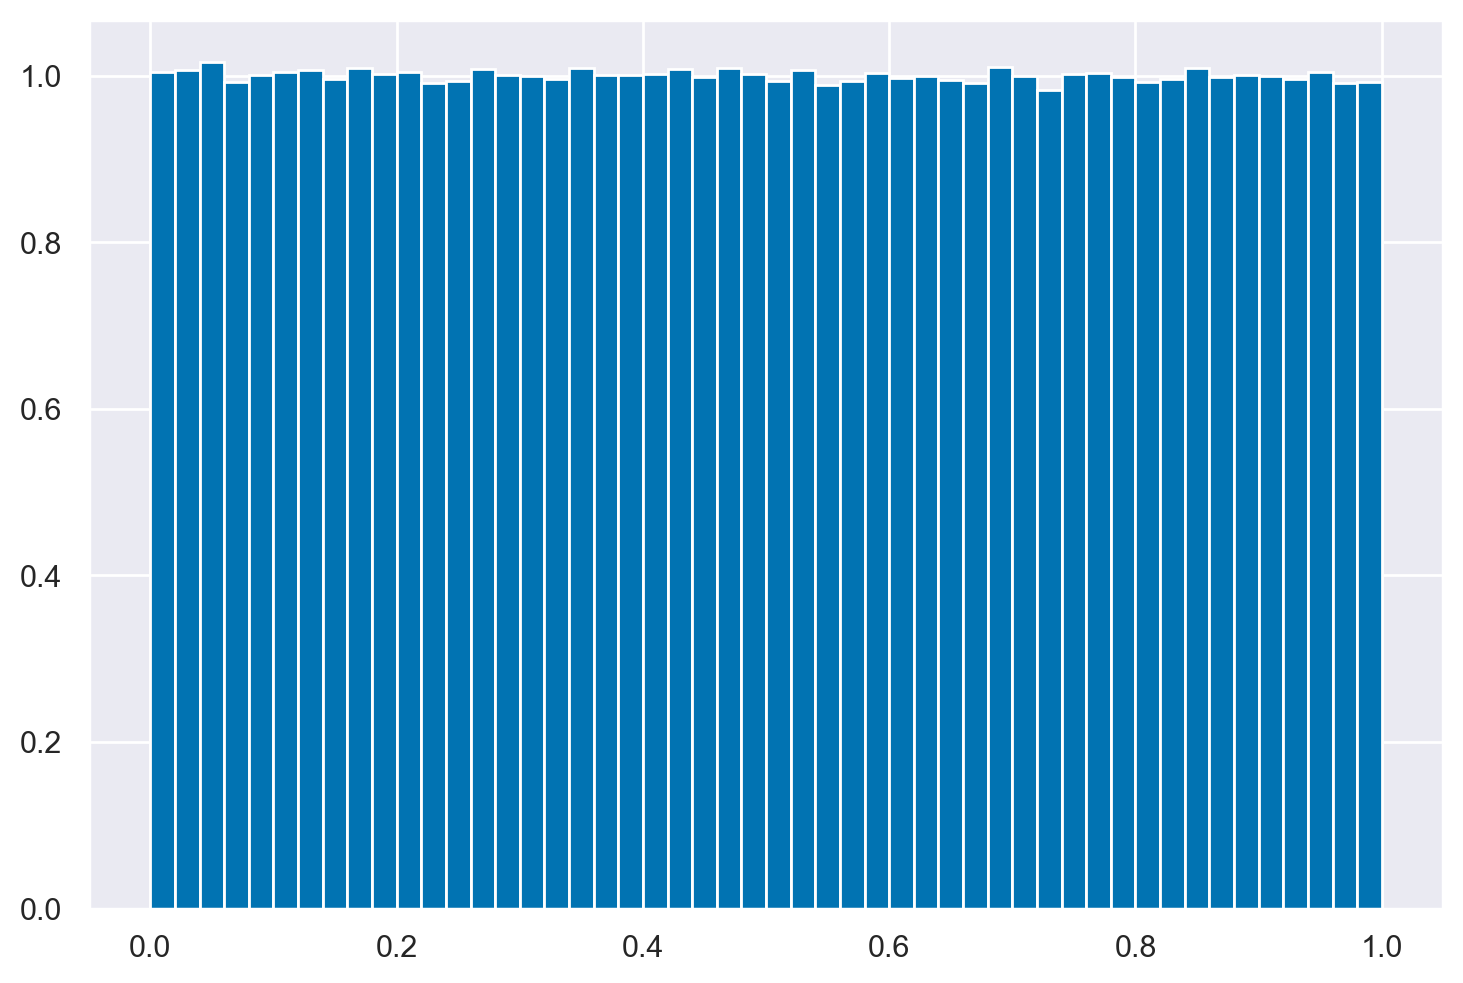

In [39]:
n_samples = 1000000
_ = plt.hist(rng.uniform(0, 1, size=n_samples), bins=50, density=True)

## Distribuzione normale

Estraiamo ora dei campioni casuali dalla distribuzione Gaussiana, `rng.normal([loc, scale, size])`. Per esempio, generiamo 10 valori dalla distribuzione $\mathcal{N}(\mu = 100, \sigma = 15)$:

In [8]:
x = rng.normal(loc=100, scale=15, size=10)
print(x)

[111.7309541   81.26336296  81.17729066 100.84159754  83.32674644
 119.49706508  95.16799064  79.23341602  97.77136425 126.86600817]


Ora generiamo un grande numero (1000000) di valori casuali dalla $\mathcal{N}(\mu = 100, \sigma = 15)$. Con questi valori creiamo un istogramma e a tale istogramma sovrapponiamo la funzione di densità $\mathcal{N}(\mu = 100, \sigma = 15)$. In questo modo possiamo accertarci che i numeri casuali  che abbiamo ottenuto si riferiscano veramente alla densità desiderata. Per trovare la densità della distribuzione normale, uso `norm.pdf` da `scipy.stats`. 

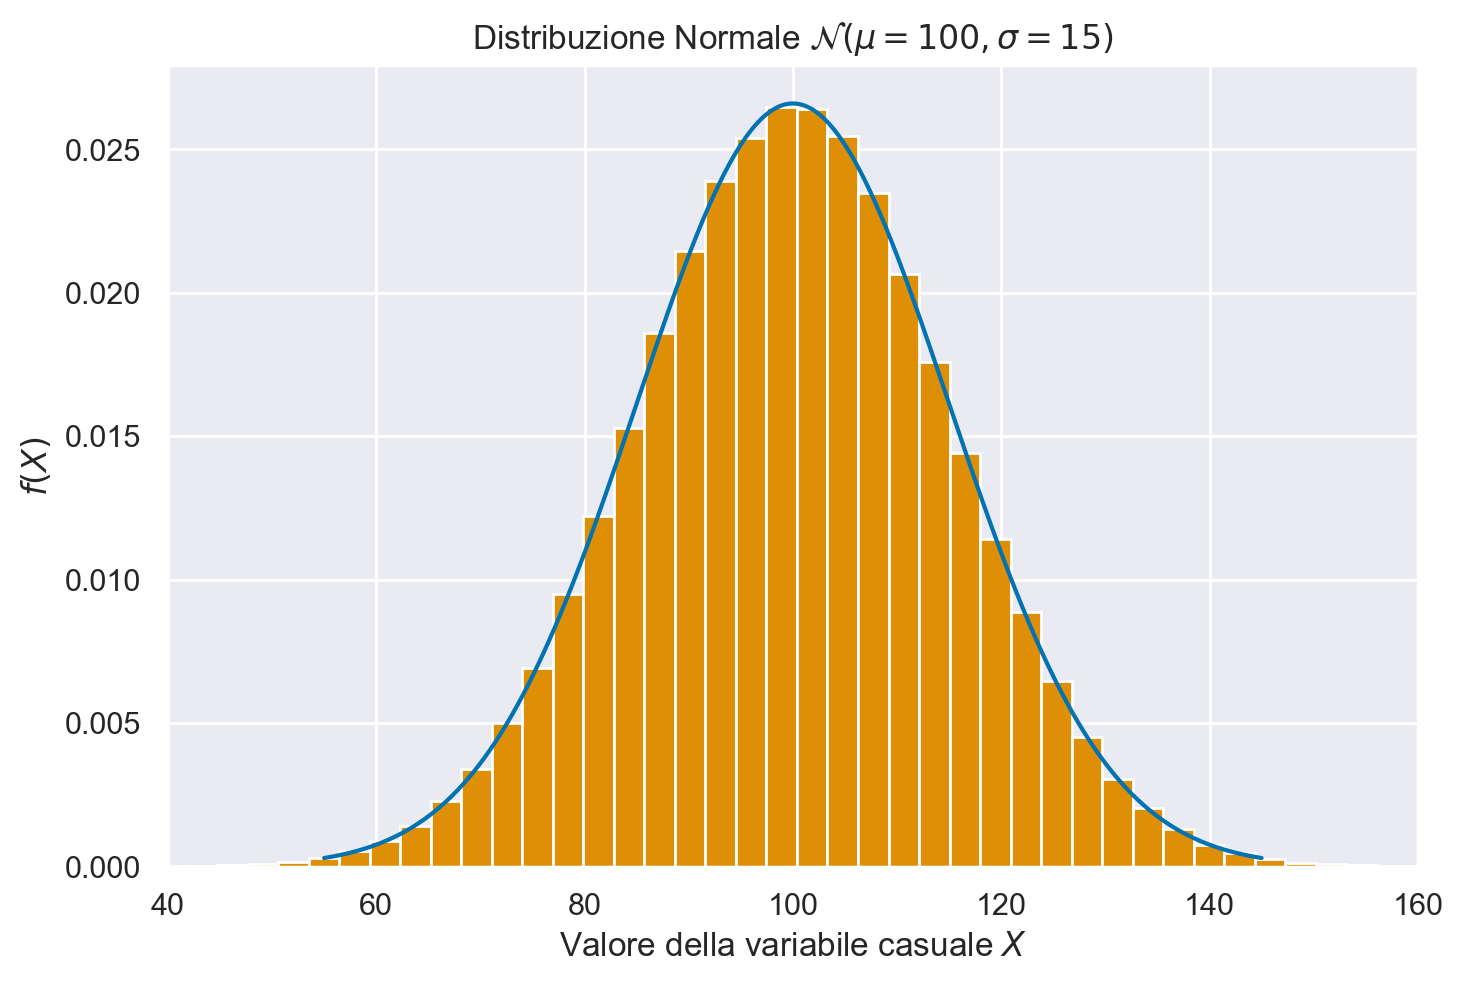

In [41]:
n_samples = 1000000
mu = 100
sigma = 15
# create x's
xs = np.linspace(55, 145, n_samples)
y_pdf = stats.norm.pdf(xs, mu, sigma)
# create random samples
samps = rng.normal(loc=mu, scale=sigma, size=n_samples)
# plot them
plt.plot(xs, y_pdf)
plt.hist(samps, bins=50, density=True)
plt.title("Distribuzione Normale $\mathcal{N}(\mu=100, \sigma=15)$")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")
plt.xlim(40, 160);

La stessa procedura può essere usata per tutte le [distribuzioni](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng) implementate da NumPy. Esaminiamo alcuni esempi qui sotto.

## Distribuzione Beta

Per estrarre dei campioni casuali dalla distribuzione Beta usiamo il generatore `rng.beta(a, b[, size])`; per la densità Beta usiamo `stats.beta.pdf(x, a, b)`.

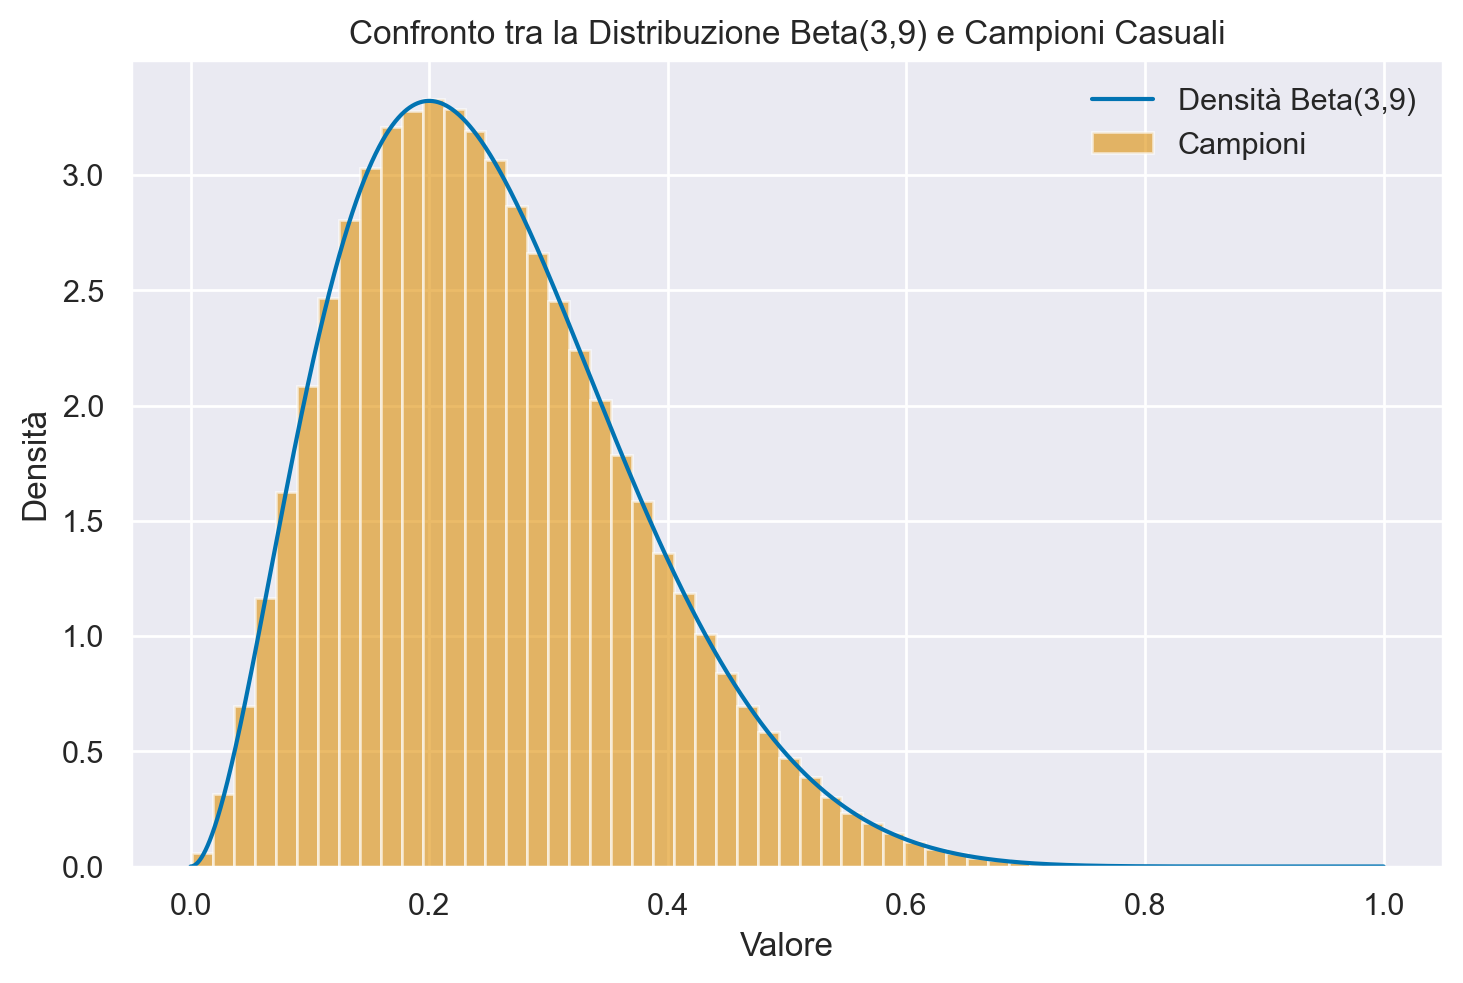

In [57]:
# Definisci il numero di campioni
n_samples = 1000000
a = 3
b = 9

# Crea un array di valori x
xs = np.linspace(0, 1, n_samples)

# Calcola la densità di probabilità (PDF) della distribuzione Beta
y_pdf = stats.beta.pdf(xs, a, b)

# Genera i campioni casuali
samps = rng.beta(a, b, size=n_samples)

# Traccia il grafico
plt.plot(xs, y_pdf, label="Densità Beta(3,9)")
plt.hist(samps, bins=50, density=True, label="Campioni")
plt.title("Confronto tra la Distribuzione Beta(3,9) e Campioni Casuali")
plt.ylabel("Densità")
plt.xlabel("Valore")
plt.legend()
plt.show();

## Distribuzione binomiale

Per estrarre dei campioni casuali dalla distribuzione Binomiale usiamo `rng.binomial(n, p[, size])`; per la distribuzione di massa Binomiale usiamo `stats.binom.pmf(r, n, p)`.

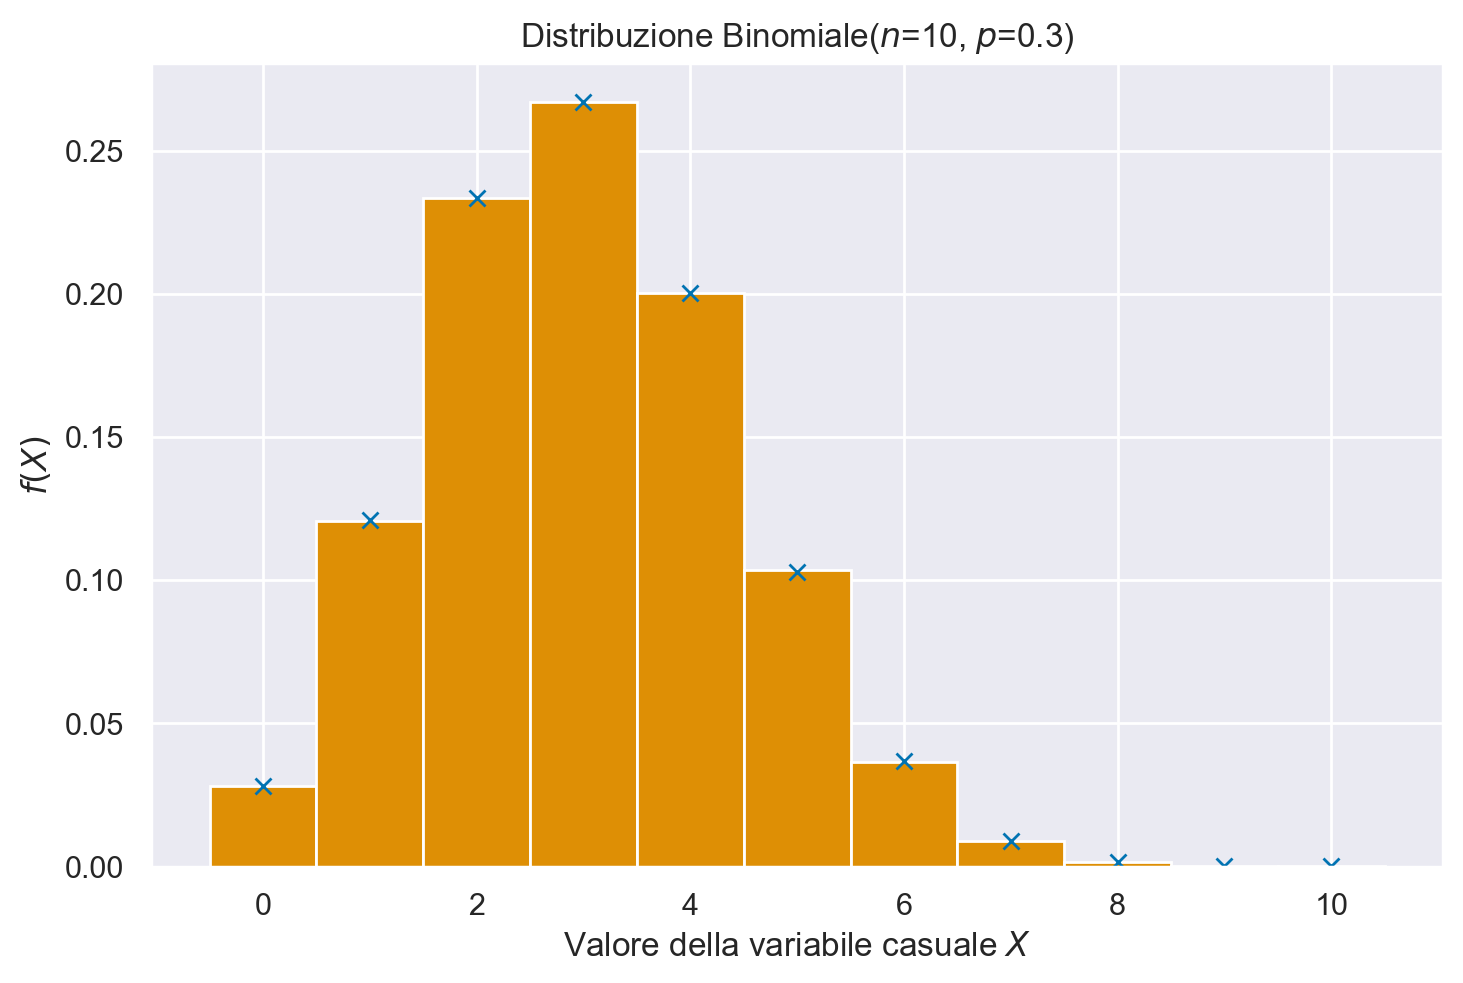

In [58]:
n_samples = 1000000

n = 10
p = 0.3
# create r values
r_values = list(range(n + 1))
# pmf
y_pmf = [stats.binom.pmf(r, n, p) for r in r_values]
# create random samples
r_samps = rng.binomial(n=n, p=p, size=n_samples)
plt.plot(r_values, y_pmf, "x")
plt.hist(r_samps, bins=np.arange(-0.5, 11.5, 1), density=True)
plt.title("Distribuzione Binomiale($n$=10, $p$=0.3)")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$");

## Distribuzione $t$ di Student

Per estrarre dei campioni casuali dalla distribuzione $t$ di Student uso il generatore `rng` con `standard_t(df, size=None)`; per la densità $t$ di Student uso `t.pdf` da `scipy.stats`.

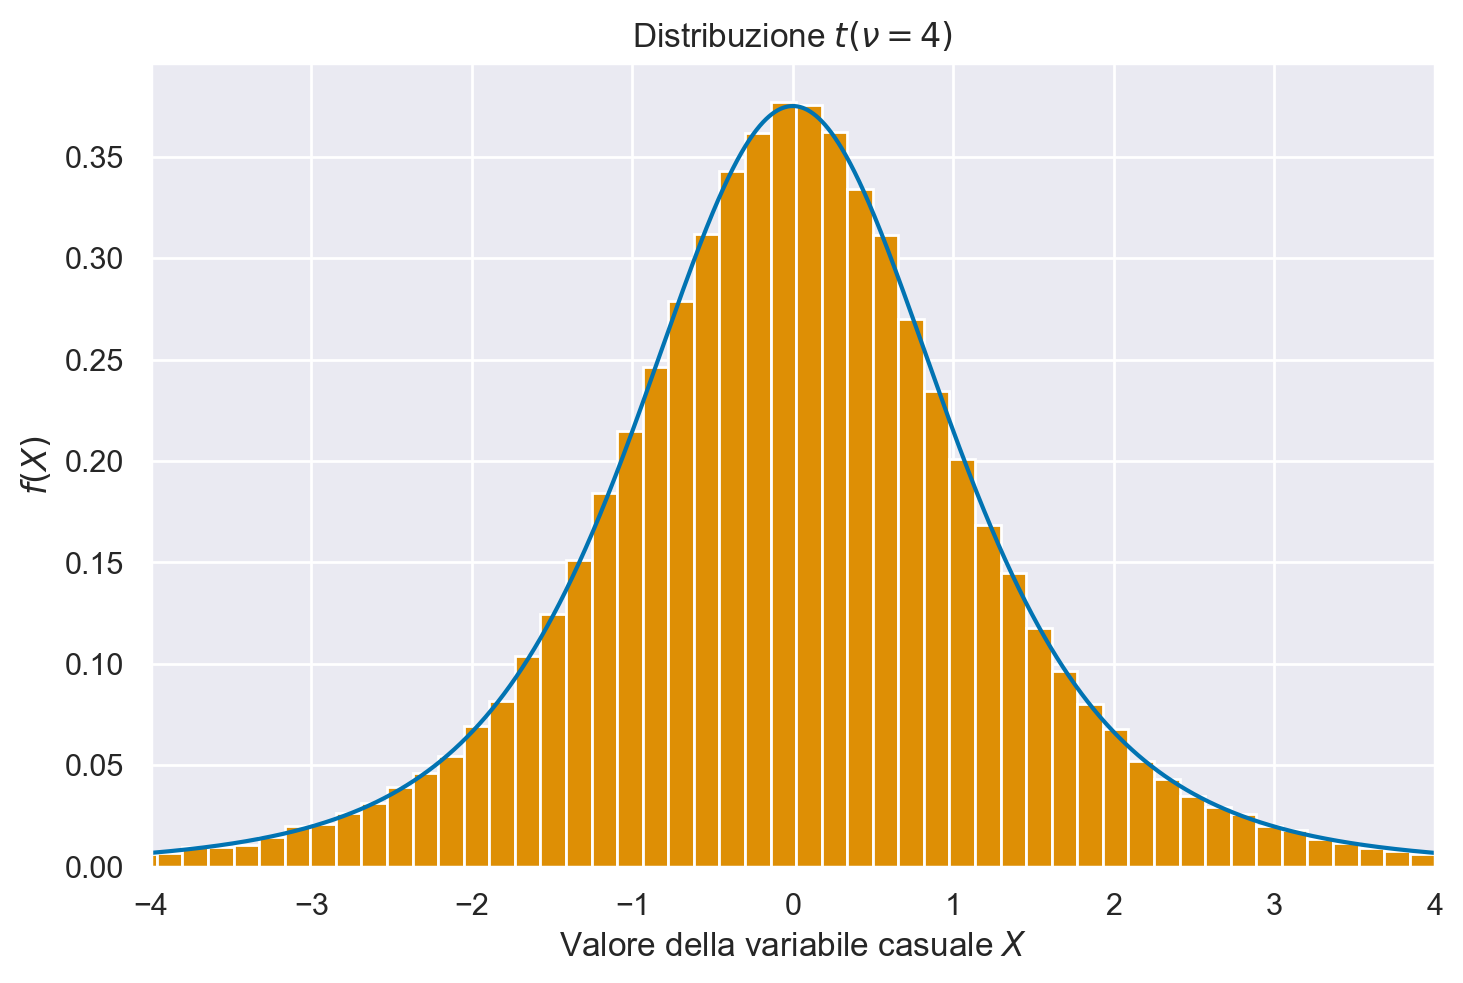

In [59]:
n_samples = 100000
df = 4
# create x's
xs = np.linspace(-4, 4, n_samples)
y_pdf = stats.t.pdf(xs, df=df)
# create random samples
samps = rng.standard_t(df=df, size=n_samples)
# plot them
fig, ax = plt.subplots()
plt.plot(xs, y_pdf)
plt.hist(samps, bins=400, density=True)
plt.title("Distribuzione $t(\\nu=4)$")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")
plt.xlim(-4, 4);

## Distribuzione arbitraria di una variabile casuale distreta

Con la funzione `random.choices` è possible specificare i valori di una variabile casuale discreta con una distribuzione di massa di probabilità arbitraria. 

In [60]:
# Define the set of values
x_rv = [1, 2, 3, 4]
# Define the weights for each value
weights = [0.1, 0.1, 0.3, 0.5]

x_sample = rng.choice(x_rv, size=100, p=weights)
print(f"Random Sample: {x_sample}")

Random Sample: [2 4 2 3 3 2 2 3 4 4 4 3 3 1 4 2 3 3 4 4 4 4 4 3 4 3 3 4 4 3 4 4 3 1 2 4 3
 1 4 3 4 2 1 3 4 1 1 4 4 4 4 4 4 3 3 3 4 4 3 4 4 4 3 4 2 4 1 3 4 3 4 1 3 3
 2 4 4 3 3 4 1 3 3 3 3 1 4 1 3 4 4 4 4 1 4 3 4 3 4 4]


Nell'esempio, i pesi `weights` indicano che, nella distribuzione, il valore `4` è presente con una frequenza di cinque volte maggiore dei valori `1` e `2`. 

Se aggiungiamo l'argomento `k` possiamo definire i pesi (indirettamente, le probabilità) dei diversi valori della variabile casuale che sono stati specificati. Nell'esempio, i pesi `[1, 1, 3, 6]` indicano che, nella distribuzione, il valore `4` è presente con una frequenza di sei volte maggiore dei valori `1` e `2`. 

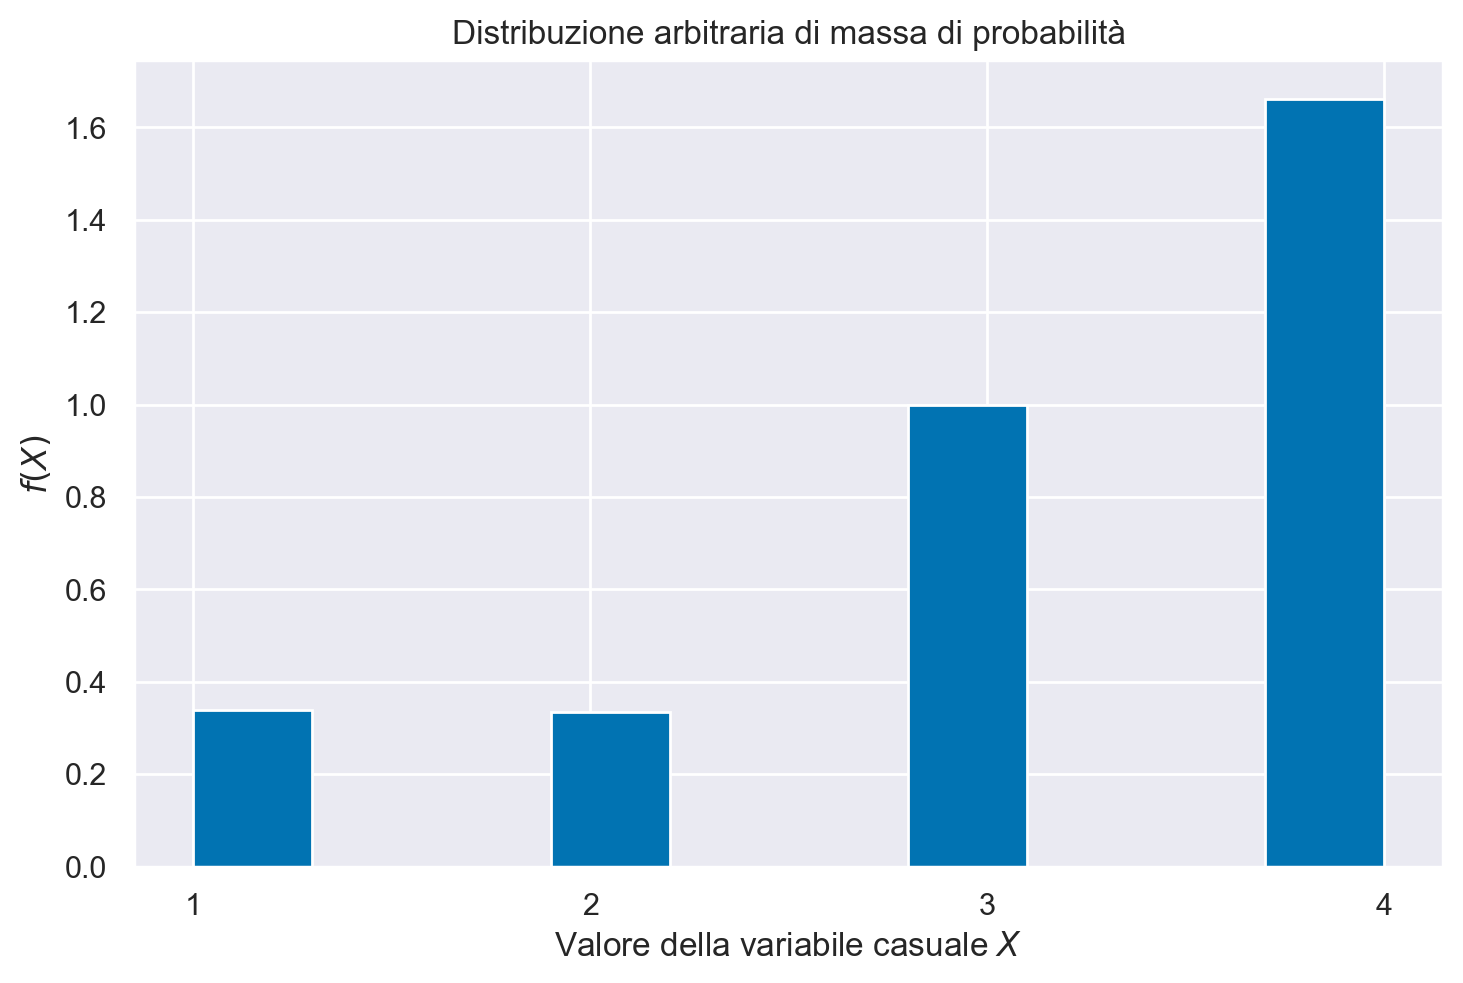

In [61]:
n_samples = 100000
x = rng.choice(x_rv, size=n_samples, p=weights)
bins = plt.hist(x, density=True)
plt.title("Distribuzione arbitraria di massa di probabilità")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")
plt.xticks(x_rv);

## Commenti e Considerazioni Finali

In questo capitolo, abbiamo esaminato l'utilizzo della funzione `rng = np.random.default_rng()` per generare un campione di numeri pseudo-casuali da una distribuzione.

Nei capitoli precedenti, specificamente nei notebook {ref}`discr_distr_notebook` e {ref}`cont-rv-distr-notebook`, abbiamo approfondito l'utilizzo di varie funzioni della libreria `scipy.stats` per manipolare le distribuzioni di probabilità. In particolare, abbiamo illustrato come sia possibile utilizzare:

- `.pdf` per ottenere i valori della funzione di densità di probabilità o `.pmf` per ottenere i valori della distribuzione di massa di probabilità.
- `.ppf` per calcolare i quantili della distribuzione.
- `.cdf` per calcolare la probabilità associata a un valore specifico. Nel caso di una variabile casuale continua, questo corrisponde al valore della funzione di ripartizione, che rappresenta l'area sotto la curva di densità nella coda sinistra. Nel caso di una variabile casuale discreta, corrisponde alla somma delle probabilità dalla distribuzione di massa di probabilità dal valore minimo fino al valore specificato (incluso).

## Ambiente di Calcolo

In [56]:
%load_ext watermark
%watermark -n -u -v -iv -w 

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Sun Jan 21 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pandas    : 2.1.4
seaborn   : 0.13.0
scipy     : 1.11.4
matplotlib: 3.8.2
numpy     : 1.26.2
arviz     : 0.17.0

Watermark: 2.4.3

